<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5CV_%EB%85%B8%EB%93%9C_4%2C5%2C6(%EC%A0%84%EC%9E%AC%EC%98%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

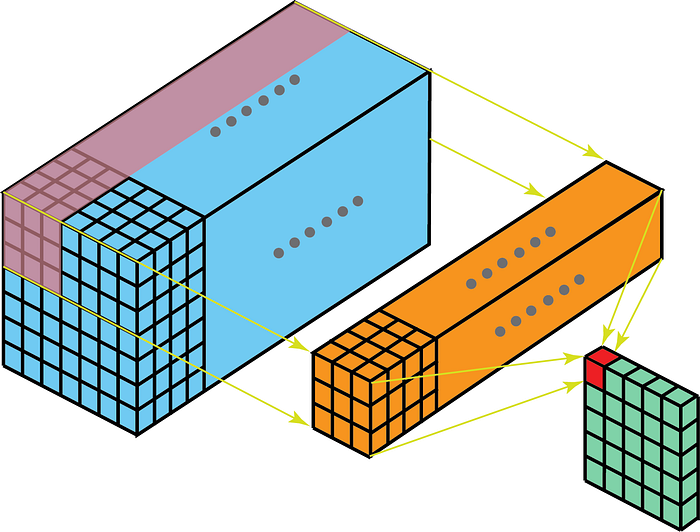

이미지 출처 :https://ai.stackexchange.com/questions/13692/when-should-i-use-3d-convolutions

파란색 : input

주황색 : filter

초록색 : output

# 중요사항 :

input channel = filter channel

(keras 에서 2D 컨볼루션의 경우 필터 사이즈를 입력하는 경우 필터의 채널수를 자동으로 입력의 채널수랑 동일하게 설정해준다.)

필터의 개수 = feature map(output) channel

(convolution을 진행하는 경우 하나의 필터는 한개의 feature map을 만든다.)

# Kernel Size:

커질수록 연산을 통해 찾아야 하는 파라미터의 수가 증가하게 됩니다.

작아질수록 데이터에 존재하는 global feature보다 local feature에 집중하게 됩니다. 쉽게 표현하자면 큼직한 특징보다는 지엽적인 특징에 집중해서 패턴을 찾게 됩니다.

# Channel size:

Filter의 channel size가 커질수록 convolution 연산을 통해서 더 다양한 패턴을 찾을 수 있습니다.

그러나 channel의 사이즈가 커짐에 따라서 연산으로 찾아야 하는 파라미터의 숫자가 증가하게 됩니다.

# Stride:

Stride 값이 커지면 데이터를 빠르게 훑고 지나가는 연산을 하게 됩니다.

따라서 지역적인 특징을 꼼꼼하게 살펴보아야 할 경우에는 stride값을 크게 하는 것이 좋지 않습니다.


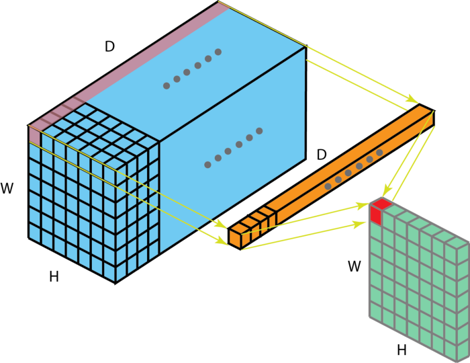

이미지 출처 :https://ai.stackexchange.com/questions/13692/when-should-i-use-3d-convolutions

파란색 : input

주황색 : filter

초록색 : output

# 1 x 1 convolution을 하는 이유

채널 수만 변경을 원하는 경우 padding을 통해 출력과 입력의 사이즈를 갖게 해주어 채널 수만 변경 가능하나 연산량이 증가하는 문제가 발생한다. 이런경우 1 x 1 convolution을 통해 연산량을 감소 시킬 수 있다.

연산량:

출력 width x 출력 height x filter 개수 x filter width x filter height x input channel

[예시 1] 28x28x192 image 데이터에 (5x5 filter, 32 channel) convolution 연산을 적용한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.

[예시 2] 28x28x192 image 데이터에 (1x1 filter, 16 channel) convolution 연산을 사용하여 channel을 줄인 뒤, 이어서 (5x5 filter, 32 channel) convolution 연산을 적용 한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.

예시 1 : 24 x 24 x 32 x 5 x 5 x 192

예시 2 : 28 x 28 x 16 x 1 x 1 x 192 + 24 x 24 x 32 x 5 x 5 x 16



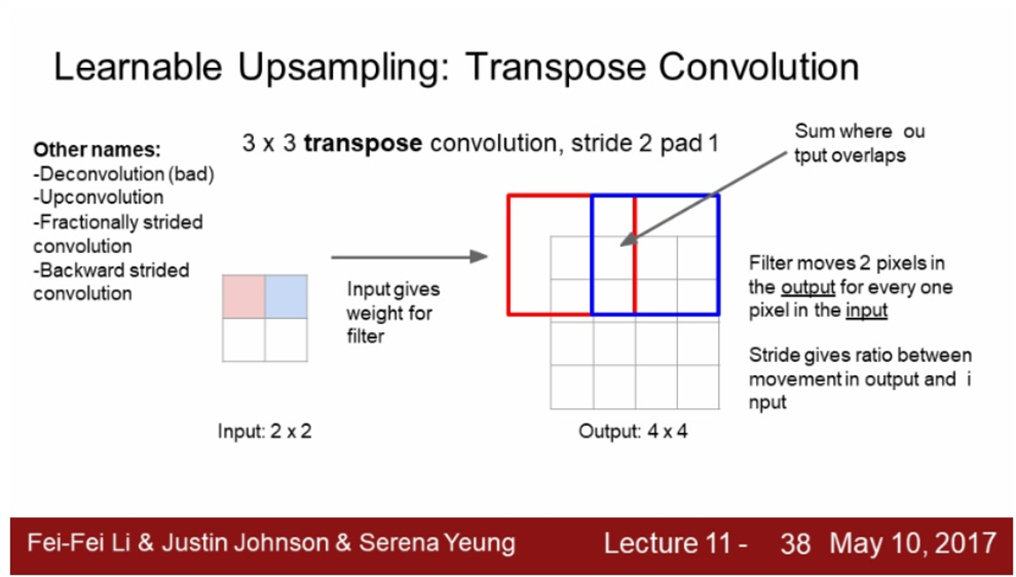

ㄴ

이미지 출처 : CS 231
# Transpose Convolution

Convolution을 down sampling 하지만 이를 반대 과정을 통해 upsampling 시킨다.

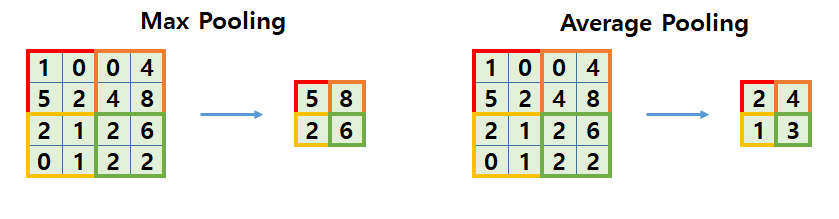

이미지 출처 :https://technical-support.tistory.com/65

# Pooling의 종류와 Pooling을 하는 이유

- Max pooling (CNN에서 주로 사용, 해당 receptive field에서 가장 큰 값만을 고름)

- Average pooling (receptive field안에 존재하는 parameter 평균값만)

- Stochastic pooling

- Cross channel pooling


# Pooling의 효과

1. parameter를 줄이기 때문에 Overfitting을 억제

2. Parameter가 줄어서 연산횟수가 감소하여 속도 증가





# Pooling의 특징

1. train 되야 할 파라미터가 없다.

2. channel 수는 유지 (independent)

3. input 에 변화에 둔감하다. (robustness)


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

def get_user_input_with_examples():
    # Input shape
    input_shape = tuple(map(int, input("입력 크기 width, height, channel (예: 32, 32, 3): ").split(",")))

    # Layers
    layers_info = []

    print("\n레이어 정보를 입력하세요 (끝내려면 'end' 입력):")
    print("예시:")
    print("Convolutional Layer: conv, 필터갯수, width, height, stride width, stide height 예: conv,32,3,3,1,1")
    print("Max Pooling Layer: maxpool, width, height 예 : maxpool,2,2")
    print("Flatten: flatten")
    print("Dense Layer: dense, unitnumber 예 : dense, 128")

    while True:
        layer_input = input().strip()

        if layer_input.lower() == 'end':
            break

        layer_info = layer_input.split(",")
        layer_type = layer_info[0].strip()

        if layer_type == "conv":
            layers_info.append({
                'type': 'conv',
                'filters': int(layer_info[1]),
                'kernel_size': (int(layer_info[2]), int(layer_info[3])),
                'stride':(int(layer_info[4]),int(layer_info[5]))
            })
        elif layer_type == "maxpool":
            layers_info.append({
                'type': 'maxpool',
                'pool_size': (int(layer_info[1]), int(layer_info[2]))
            })
        elif layer_type == "flatten":
            layers_info.append({
                'type': 'flatten'
            })
        elif layer_type == "dense":
            layers_info.append({
                'type': 'dense',
                'units': int(layer_info[1])
            })
        else:
            print(f"지원하지 않는 레이어 타입: {layer_type}. 다시 입력해주세요.")

    return input_shape, layers_info


input_shape, layers_info = get_user_input_with_examples()
(input_shape, layers_info)

def create_cnn_model(input_shape, layers_info):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    for layer in layers_info:
        layer_type = layer['type']
        if layer_type == 'conv':
            model.add(layers.Conv2D(layer['filters'], layer['kernel_size'], strides = layer['stride'], padding = 'valid', activation='relu'))
        elif layer_type == 'maxpool':
            model.add(layers.MaxPooling2D(layer['pool_size']))
        elif layer_type == 'flatten':
            model.add(layers.Flatten())
        elif layer_type == 'dense':
            model.add(layers.Dense(layer['units'], activation='relu'))

    return model


def compute_operations(input_shape, layers_info):
    # Store operations for each layer
    operations_list = []

    current_shape = input_shape

    for layer in layers_info:
        layer_type = layer['type']

        # Convolutional Layer
        if layer_type == 'conv':
            ops = current_shape[0] * current_shape[1] * layer['filters'] * layer['kernel_size'][0] * layer['kernel_size'][1] * current_shape[2]
            operations_list.append(f"Conv Layer: {ops} operations")
            # Update the shape after convolution (assuming stride=1 and 'same' padding)
            current_shape = (current_shape[0], current_shape[1], layer['filters'])

        # Max Pooling Layer
        elif layer_type == 'maxpool':
            ops = current_shape[0] * current_shape[1] * current_shape[2] * layer['pool_size'][0] * layer['pool_size'][1]
            operations_list.append(f"MaxPool Layer: {ops} operations")
            # Update the shape after max pooling
            current_shape = (current_shape[0] // layer['pool_size'][0], current_shape[1] // layer['pool_size'][1], current_shape[2])

        # Flatten Layer
        elif layer_type == 'flatten':
            # No operations, just reshaping
            operations_list.append("Flatten Layer: 0 operations")
            current_shape = (current_shape[0] * current_shape[1] * current_shape[2],)

        # Dense Layer
        elif layer_type == 'dense':
            ops = current_shape[0] * layer['units']
            operations_list.append(f"Dense Layer: {ops} operations")
            current_shape = (layer['units'],)

    return operations_list

입력 크기 width, height, channel (예: 32, 32, 3): 28,28,3

레이어 정보를 입력하세요 (끝내려면 'end' 입력):
예시:
Convolutional Layer: conv, 필터갯수, width, height, stride width, stide height 예: conv,32,3,3,1,1
Max Pooling Layer: maxpool, width, height 예 : maxpool,2,2
Flatten: flatten
Dense Layer: dense, unitnumber 예 : dense, 128
32,3,3,2,2
지원하지 않는 레이어 타입: 32. 다시 입력해주세요.
conv,32,3,3,2,2
end


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
['Conv Layer: 677376 operations']


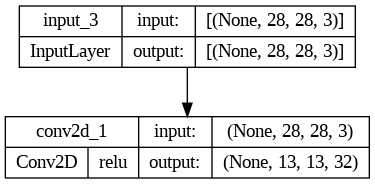

In [ ]:
model = create_cnn_model(input_shape, layers_info)
model.summary()

operations = compute_operations(input_shape, layers_info)
print(operations)

plot_model(model, show_shapes=True, show_layer_activations=True)

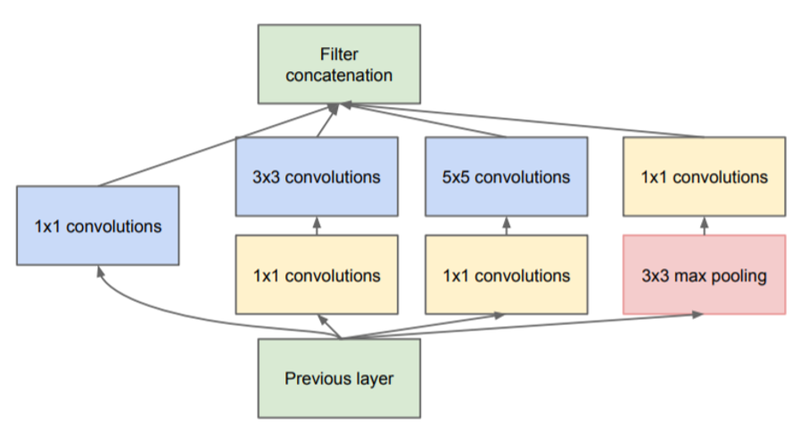

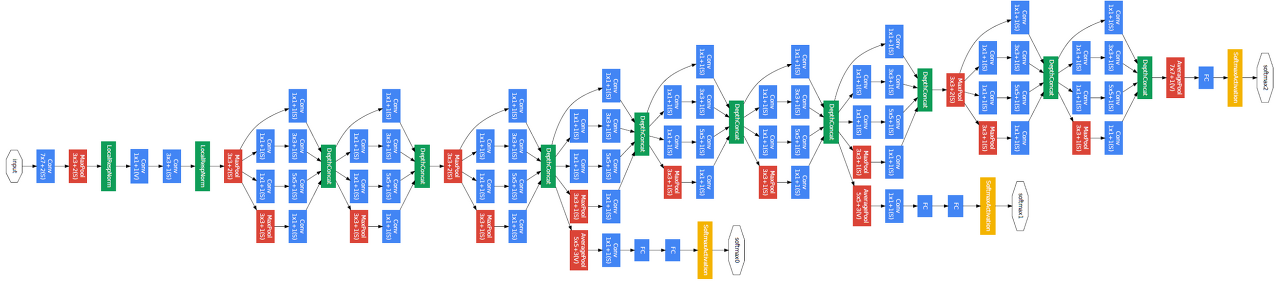

이미지 출처 : aiffel 노드
# GoogLe Net inception module

1 x 1 filter를 사용하면 channel 수를 줄이기 때문에 연산량도 감소하고, 활성화 함수를 2번 사용하여 비선형성을 강화시킨다는 장점이 있습니다.

GoogLeNet에서는 Inception Module 이후, fully conected layer 대신 Global Average Pooling을 통해 연산량 감소 시킴

Auxiliary classifier를 모델에 2개를 붙여 결과적으로 loss를 맨 끝뿐만 아니라 중간에서도 구하기 때문에 기울기를 역전파 시킬 수 있었습니다.

대신 결과에 지나치게 영향을 주는 것을 막기 위해 auxiliary classifier의 loss에는 0.3을 곱하였습니다. 그리고 실제로 테스트하는 과정에서는 auxiliary classifier를 제거하고, 맨 끝의 softmax만을 사용하였습니다.




In [ ]:
from tensorflow import keras
# Inception 블록을 만들기 위한 함수
def inception(input_layer, conv1_filter, conv3_in, conv3_out, conv5_in, conv5_out, pooling_out):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)
    # 3x3 사이즈의 kernel을 이용한 convolution2d layer
    conv3 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    conv3 = keras.layers.Conv2D(conv3_out, (3,3), padding='same', activation='relu')(conv3)


    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer 를 만들어 보세요.
    # [[YOUR CODE]]
    conv5 = keras.layers.Conv2D(conv5_in, (1,1), padding='same', activation ='relu')(input_layer)
    conv5 = keras.layers.Conv2D(conv5_out, (5,5), padding ='same', activation ='relu')(conv5)


    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    pool = keras.layers.Conv2D(pooling_out, (1,1), padding='same', activation='relu')(pool)
    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

In [ ]:
input_data = keras.layers.Input(shape=(256, 256, 3))
inception_out = inception(input_data, 64, 96, 128, 16, 32, 32)

In [ ]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, outputs=inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 256, 256, 96  384         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_5 (Conv2D)              (None, 256, 256, 16  64          ['input_4[0][0]']                
                                )                                                             

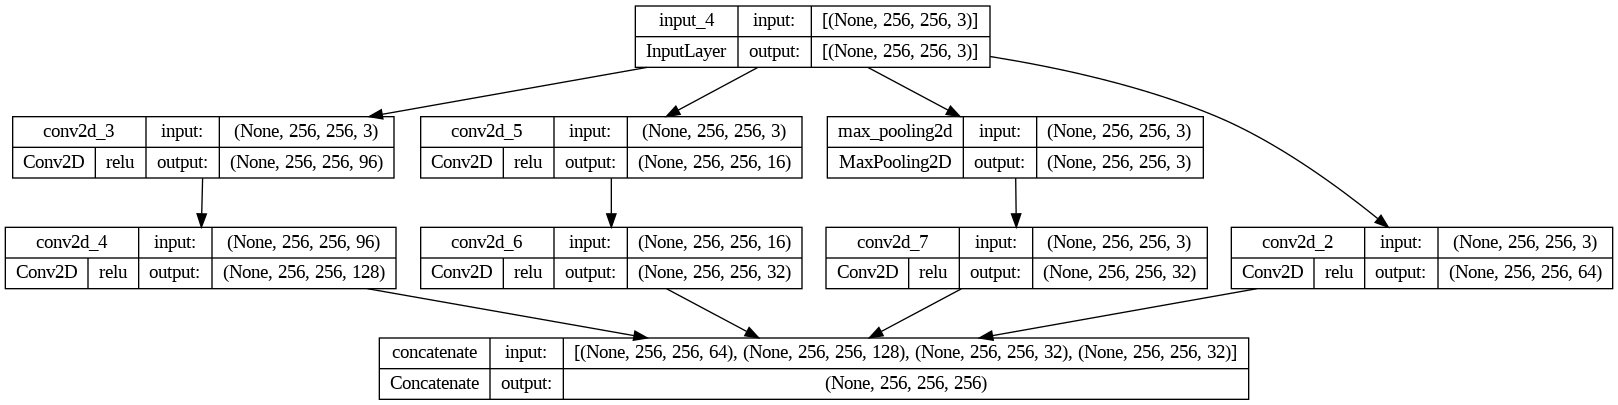

In [ ]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, show_layer_activations=True)

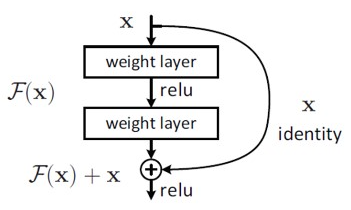

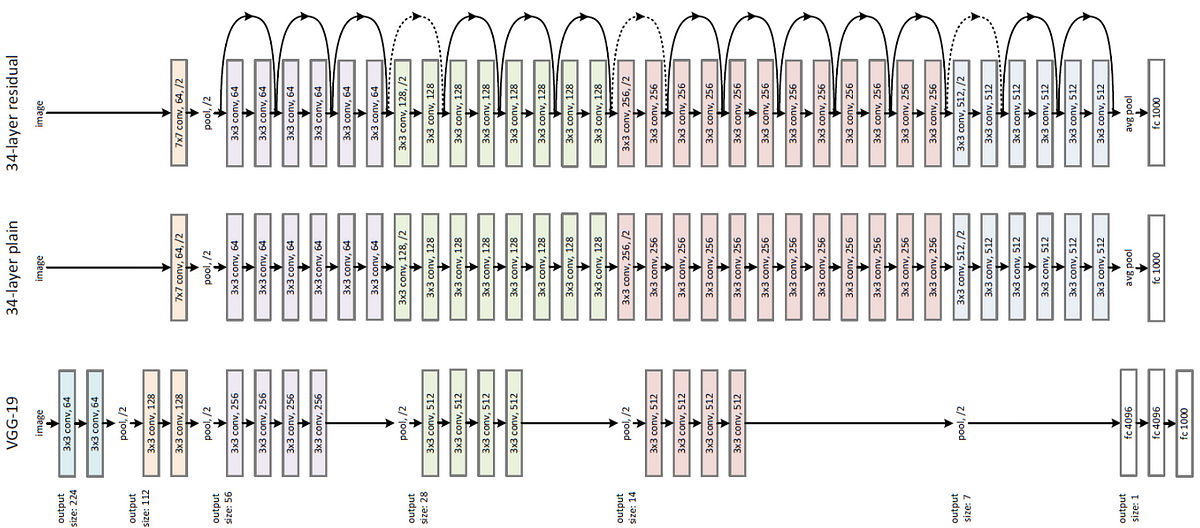

# ResNet 특징

Residual Learning은 일정 시점마다 input x 자체를 skip connection을 통해 연결합니다. 이로 인해 backpropagation을 할 때 Identitiy mapping을 통해 loss 값이 변함 없이 전달되기 때문에 Gradient flow가 원활하게 이루어집니다. 따라서 모델을 깊게 쌓는 것에 대한 부담이 줄어듭니다.

그래서 Vanishing gradient의 문제를 해결할 수 있어 Skip Connection을 gradient “highway”라고 부르기도 합니다.

In [ ]:
def residual_module(input_layer, n_filters):
	merge_input = input_layer

# if문에서는 채널 사이즈가 동일한지 확인하고, 만일 동일하지 않다면 1x1 convolution을 통해서 채널 사이즈를 맞춰 준다.
	if input_layer.shape[-1] != n_filters:
		merge_input = keras.layers.Conv2D(n_filters, (1,1), padding='same', activation='relu')(input_layer) # n_filter로 채널 사이즈를 맞춰 준다.
	# Conv2D layer
	conv1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu')(input_layer)
	# Conv2D layer
	conv2 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)

  # Add를 통해서 skip connection을 구현하는 부분
	out_layer = keras.layers.Add()([conv2, merge_input])
	out_layer = keras.layers.Activation('relu')(out_layer)

	return out_layer

In [ ]:
input = keras.layers.Input(shape=(256, 256, 3))
residual_out = residual_module(input, 64)

In [ ]:
model = keras.models.Model(inputs=input, outputs=residual_out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 256, 256, 64  1792        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_10 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_9[0][0]']               
                                )                                                           

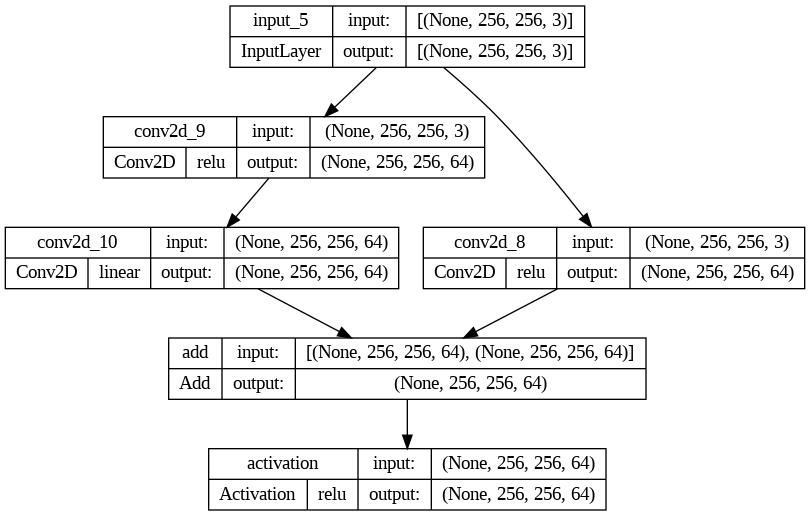

In [ ]:
plot_model(model, show_shapes=True, show_layer_activations=True)